# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 5<span>

### Esercizio 05.1

Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ in Cartesian coordinates using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.


Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

Il codice scritto simula l'andamento del valor medio $\left\langle r \right\rangle$ per l'atomo di idrogeno negli stati $ (n, l, m)=(1, 0, 0) $ e $ (n, l, m)=(2, 1, 0) $. Per far questo il codice campiona la probabilità del modulo quadro della funzione d'onda associata a questi stati. In Meccanica Quantistica infatti, la funzione d'onda di uno stato è una densità di probabilità: farne il modulo quadro significa ottenere la probabilità di osservare l'atomo in quella configurazione. Per campionare questa probabilità è stato utilizzato l' Algoritmo di Metropolis.

<font color="red">L' Algoritmo di Metropolis</font> è un algoritmo utilizzato per campionare qualsiasi distribuzione di probabilità. Il suo funzionamento è semplice e può essere riassunto in questi punti.
1. Iniziando da una data conformazione $x$, si genera una nuova configurazione $x \to y$ secondo una certa distribuzione di probabilità $T(x|y)$.
2. Viene a questo punto calcolata la probabilità di accettare la mossa come: $A(x|y)=\min(1, \frac{T(x|y)p(y)}{T(y|x)p(x)}) = \min(1, \frac{p(y)}{p(x)})$ se T è simmetrica.
3. Viene a questo punto accettata la mossa fatta con probabilità $A(x|y)$. Ovvero genero uniformemente un numero $r \in (0,1)$. Se $r < A(x|y)$ accetto la mossa tentativa. Altrimenti mantengo la conformazione x.


La forza dell'Algoritmo di Metropolis risiede appunto nel campionare una qualsiasi distribuzione di probabilità nota. L'unica attenzione è quello di utilizzare una probabilità tentativa $T(x|y)$ simmetrica, così da facilitare il calcolo della probabilità di accettazione.
Per ottimizzare il campionamento di $\Psi_{1,0,0}$, e il campionamento di $\Psi_{2,1,0}$, ho implementato una funzione per l'Algoritmo di Metropolis che richiede in ingresso anche il modulo quadro della funzione d'onda che si vuole campionare. Così facendo nel `main`, per campionare le due probabilità, posso semplicemente richiamare un'unica funzione per l'Algoritmo di Metropolis sia per lo stato $ (n, l, m)=(1, 0, 0) $ che per lo stato $ (n, l, m)=(2, 1, 0) $.


Come suggerito dall'esercizio, ho inizialmente utilizzato una probabilità $T(x|y)$ uniforme. Questa probabilità tentativa è simmetrica, pertanto la probabilità di accettazione risulta semplicemente essere: $A(x|y)= \min(1, \frac{p(y)}{p(x)})$. La nuova conformazione $y$ viene quindi estratta come:

$$y= x+ \sigma \cdot r$$ 

con $r \in (0,1)$ estratto uniformemente, e $\sigma$ scelto in modo tale da avere una probabilità di accettazione il più prossima al 50%. Nel mio caso, per lo stato associato alla funzione d'onda $\Psi_{1,0,0}$ ho avuto bisogno di $\sigma=1.2 \cdot a_0$, dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il Raggio di Bohr.

<font color="red"> N.B.</font> siccome sto campionando delle funzioni d'onda in coordinate cartesiane, in realtà nel codice quelle che in questo report ho chiamato $x$ e $y$ sono vettori di dimensionalità 3: devo quindi svolgere tutte le operazioni illustrate per singolarmente tutte e tre le coordinate del vettore.

Quindi il codice campiona delle posizione nello spazio tridimensionale campionati con le distribuzioni di probabilità date da $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$. Ad ogni campionamento viene calcolato il valore di $r =\sqrt{x^2+y^2+z^2}$, e viene salvata in un opportuno vettore con cui posso richiamare le funzioni implementate nelle scorse esercitazioni per compiere Data Blocking con queste misure.


Ho campionato $10^6$ posizione suddivise in 1000 blocchi. La forma analitica delle due funzioni d'onda campionate sono:

- Per lo stato $(n, l, m)=(1, 0, 0)$ la forma analitica è $\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}\  $

- Per lo stato $(n, l, m)=(2, 1, 0)$ la forma analitica è $\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)$


Dopo aver compiuta la simulazione con una probabilità di accettazione $T(x|y)$ uniforme, ho compiuto una nuova simulazione campionando con una probabilità di accettazione $T(x|y)$ gaussiana.

Ho confrontato i risultati siulati con i valori attesi dalla meccanica quantistica: 

$$\langle r \rangle _ {1,0,0} = \frac{3}{2}a_0 \qquad \langle r \rangle _ {2,1,0} = 5a_0 $$

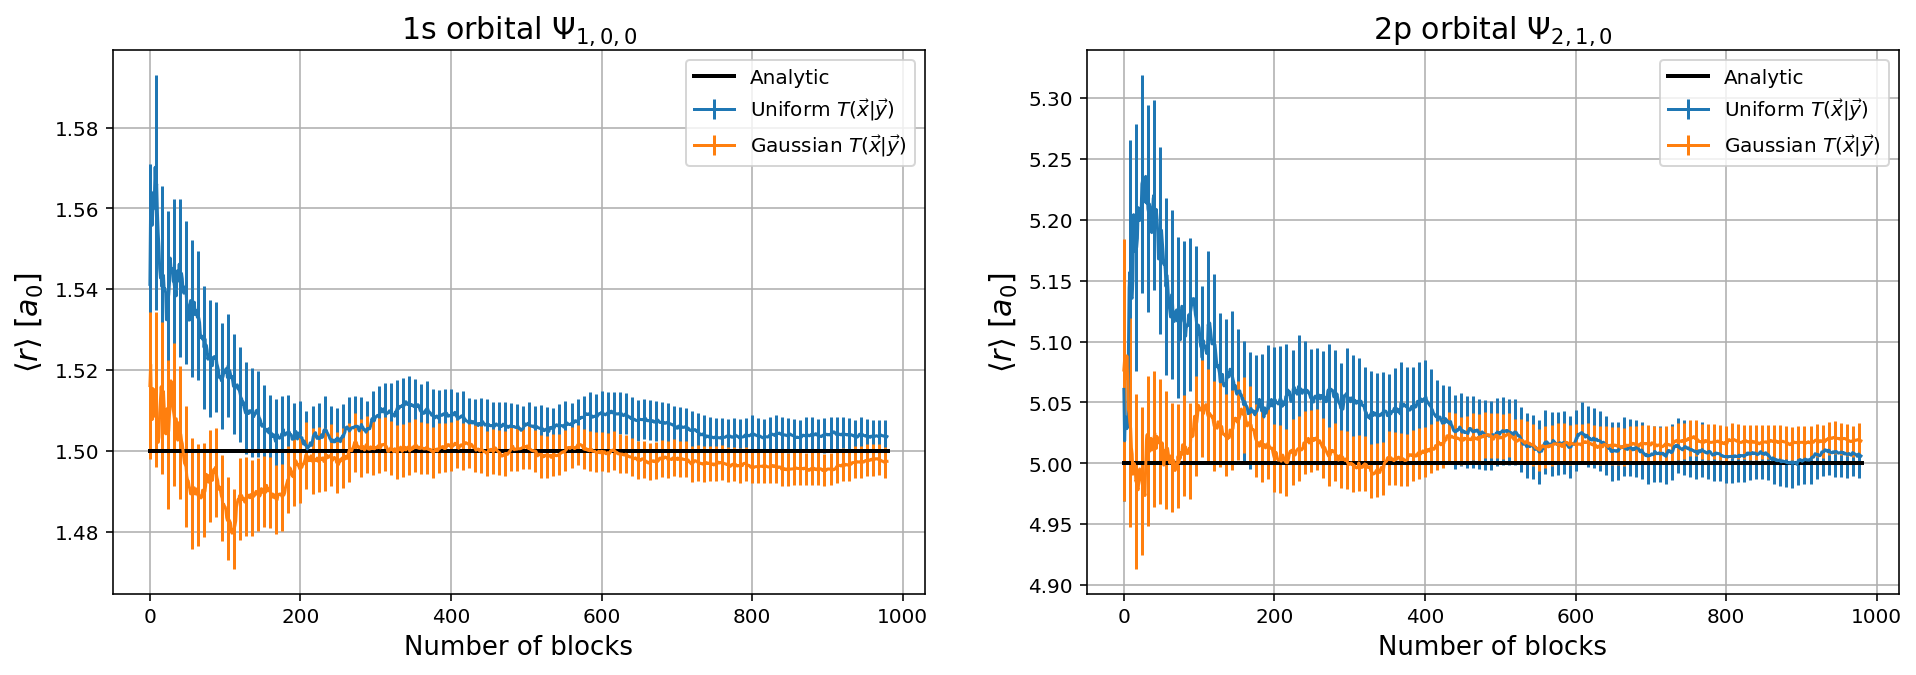

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

a=0.0529*pow(10,-9) #Bohr radius

r, error = np.loadtxt("./05.1/Medium_radius.txt", usecols=(0,2), delimiter=' ', unpack='true',skiprows=20)/a
r_gauss, error_gauss = np.loadtxt("./05.1/Medium_radius_gauss.txt", usecols=(0,2), delimiter=' ', unpack='true',skiprows=20)/a
r_2, error_2 = np.loadtxt("./05.1/Medium_radius_2.txt", usecols=(0,2), delimiter=' ', unpack='true',skiprows=20)/a
r_gauss_2, error_gauss_2 = np.loadtxt("./05.1/Medium_radius_gauss_2.txt", usecols=(0,2), delimiter=' ', unpack='true',skiprows=20)/a





N=1000
M=1000000
L=int(M/N)

x = np.arange(N-20)
x*=L



fig, axs = plt.subplots(1, 2, figsize=(16,5))
axs[0].errorbar(x/L,r,yerr=error, errorevery=8, label=r'Uniform $T(\vec{x}|\vec{y})$')
axs[0].errorbar(x/L,r_gauss,yerr=error_gauss, errorevery=8, label=r'Gaussian $T(\vec{x}|\vec{y})$')
axs[0].set_title(r'1s orbital $\Psi_{1,0,0}$', fontsize=15)
axs[0].plot([0,980],[1.5,1.5], label='Analytic', color='black', linewidth=2)

axs[1].errorbar(x/L,r_2,yerr=error_2, errorevery=8, label=r'Uniform $T(\vec{x}|\vec{y})$')
axs[1].errorbar(x/L,r_gauss_2,yerr=error_gauss_2, errorevery=8, label=r'Gaussian $T(\vec{x}|\vec{y})$')
axs[1].set_title(r'2p orbital $\Psi_{2,1,0}$', fontsize=15)
axs[1].plot([0,980],[5,5], label='Analytic', color='black', linewidth=2)


for ax in axs.flat:
    ax.grid()
    ax.legend()
    ax.set_xlabel('Number of blocks', fontsize=13)
    ax.set_ylabel(r'$\left\langle r \right\rangle$ $[a_0]$', fontsize=15)





Come è possibile osservare dai grafici soprastanti, il risultato converge ai valori attesi di $\left\langle r \right\rangle$ sia per una probabilità tentativa $T(x|y)$ uniforme, che per una probabilità tentativa $T(x|y)$ gaussiana. I grafici sono stati riportati in unità del raggio di Bohr $a_0$. La convergenza è garantita entro una deviazione standard appena dopo i 200 blocchi.


Una volta eseguite queste simulazioni, ho provato a condurne un'ultima di un orbitale 1s, partendo da una configurazione con un raggio molto lontano dal valore atteso dalla meccanica quantistica. Ho riportato in figura i valori campionati di $\left\langle r \right\rangle$ in quest'ultima simulazione.

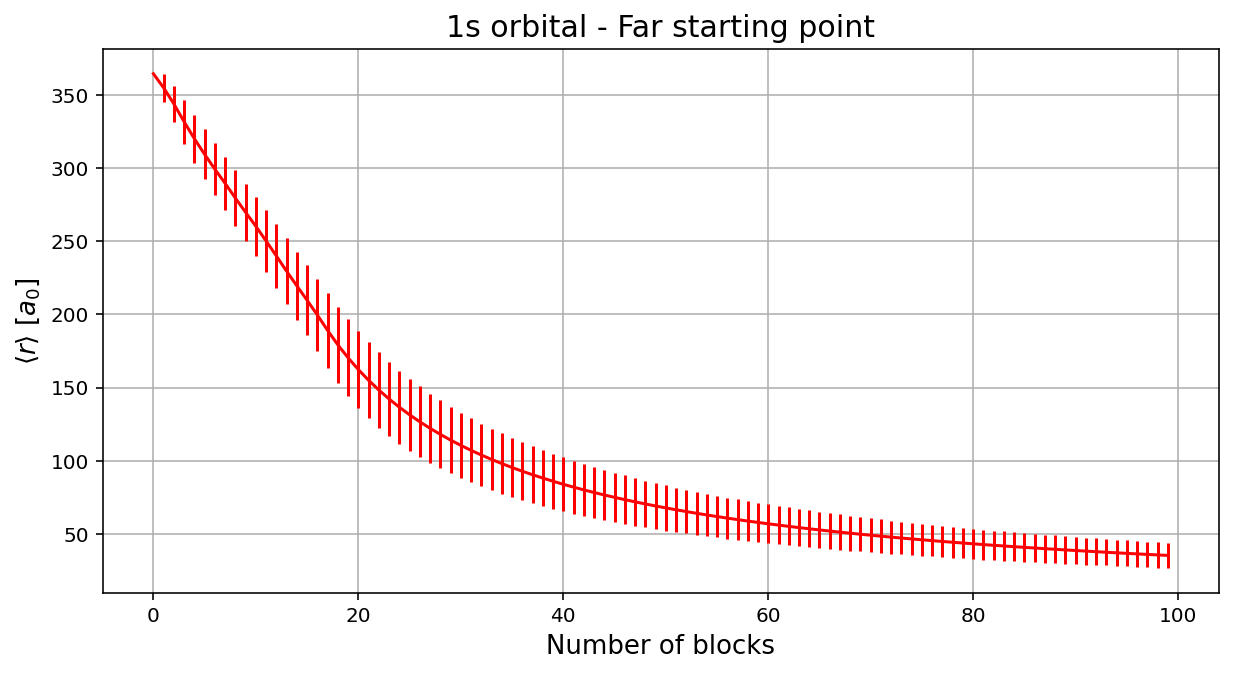

In [35]:
r, error = np.loadtxt("./05.1/Medium_radius_far.txt", usecols=(0,2), delimiter=' ', unpack='true')/a
N=100
M=10000
L=int(M/N)

x = np.arange(N)
x*=L

a=0.0529*pow(10,-9)

plt.figure(figsize=(10,5))
plt.errorbar(x/L,r-3*a/2,yerr=error, c='red')
plt.title("1s orbital - Far starting point",fontsize=15)
plt.xlabel('Number of blocks', fontsize=13)
plt.ylabel(r'$\left\langle r \right\rangle$ $[a_0]$', fontsize=13)


plt.grid()
plt.show()

Il risultato ottenuto non mi sorprende. Quello che si può osservare è che l'andamento di $\left\langle r \right\rangle$ va verso il valore atteso, ma in questo caso la convergenza non è molto molto più lenta. Infatti, l'Algoritmo di Metropolis consente di eseguire passi di appena un certo $\sigma$ che è stato giustamente scelto dello stesso ordine di grandezza dell'atomo di Bohr $a_0$. Per questi valori iniziali di $r$ (molto maggiori del raggio di Bohr), il modulo quadro della funzione d'onda è lontano dai minimi di energia:  l'algoritmo faticherà a raggiungere zone in cui si ha massima probabilità di campionamento. Anche dopo $10^4$ campionamenti il valore di $\left\langle r \right\rangle$ è molto lontano dal suo valore di convergenza.

Infine ho riportato uno scatterplot tridimensionale per mostrare gli orbitali dell'atomo di idrogeno negli stati $ (n, l, m)=(1, 0, 0) $ e $ (n, l, m)=(2, 1, 0) $.

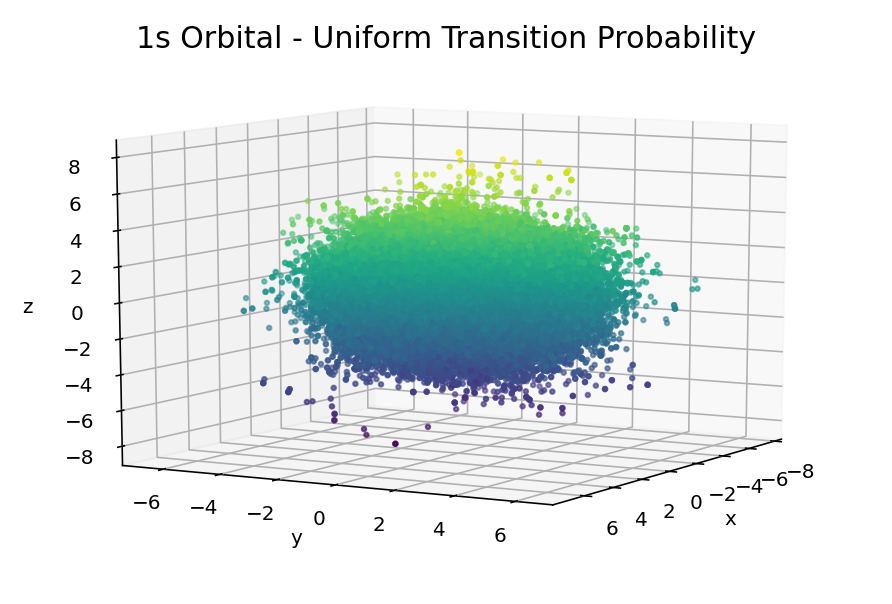

In [17]:
X, Y, Z = np.loadtxt("./05.1/Coordinates_file.txt", usecols=(0,1,2), delimiter=' ', unpack='true')/a


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_title("1s Orbital - Uniform Transition Probability", fontsize=15)
ax_2.set_title('1s orbital')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

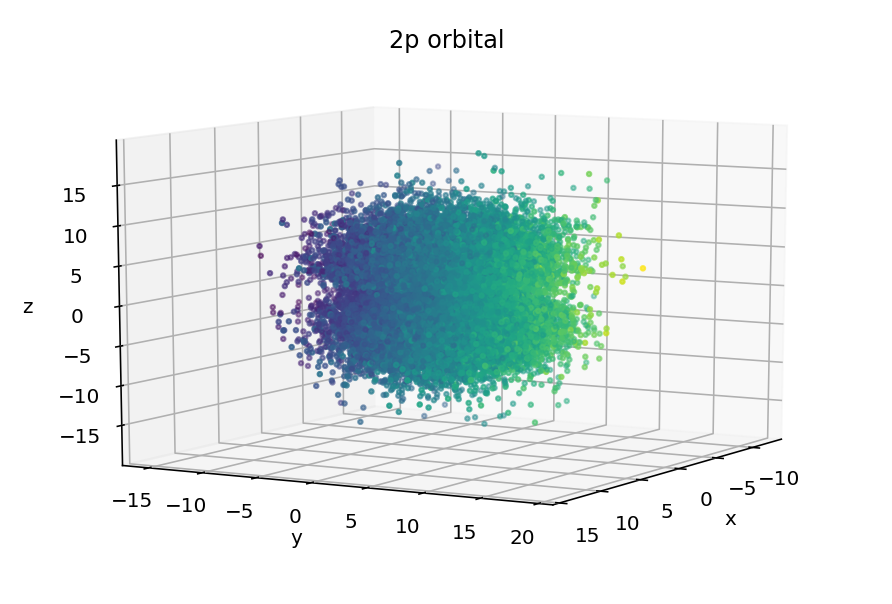

In [18]:
X_2, Y_2, Z_2 = np.loadtxt("./05.1/Coordinates_file_2.txt", usecols=(0,1,2), delimiter=' ', unpack='true')/a


fig_2 = plt.figure()
ax_2 = Axes3D(fig_2)
ax_2.scatter(Y_2, Z_2, X_2, c=Z_2, marker='.')
ax.set_title("2p Orbital - Uniform Transition Probability", fontsize=15)
ax_2.set_title('2p orbital')
ax_2.set_xlabel('x')
ax_2.set_ylabel('y')
ax_2.set_zlabel('z')
ax_2.view_init(10, 30)
plt.show()